In [2]:
import pydoc
import ast
import importlib
import re
import json

[('matplotlib.pyplot', '*'), ('matplotlib', 'pyplot'), ('matplotlib.pyplot', '*'), ('matplotlib.pyplot', 'plot,')]


Imported module: matplotlib.pyplot
Attribute: *
Imported module: matplotlib
Attribute: pyplot
Imported module: matplotlib.pyplot
Attribute: *
Imported module: matplotlib.pyplot
Attribute: plot,


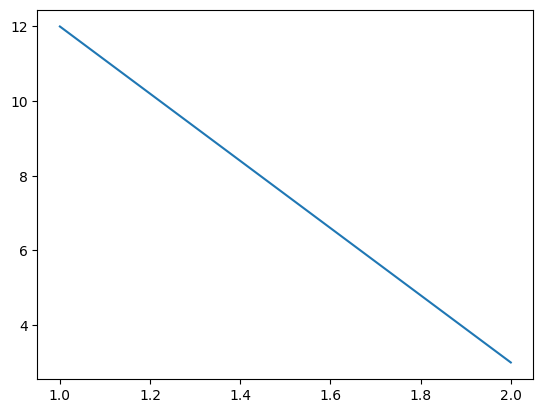

In [3]:
import re
import importlib

# Response from LLM
res = '''
# This is a sample np.array(np.ones(5)) and another np.sum example
# Comment to check inline many functions

import numpy as np
from matplotlib.pyplot import *

# Three cases
# 1. from matplotlib import pyplot
# 2. from matplotlib.pyplot import *
# 3. from matplotlib.pyplot import plot, show

x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)

pyplot.plot(x, y)
pyplot.show()
'''

# Define a regex pattern to match import statements
import_pattern = re.compile(r'from\s+(\S+)\s+import\s+(\S+)')

# Find all matches in the response
matches = import_pattern.findall(res)
print(matches)
# Import the modules dynamically
for module in matches:
    module_name = module[0]
    attribute_name = module[1]

    # Import the module
    imported_module = importlib.import_module(module_name)
    # imported_module = importlib.import_module(".".join(module))

    # Now you can use the imported module and its attributes
    print(f"Imported module: {module_name}")
    print(f"Attribute: {attribute_name}")

# Your existing code (with pyplot.show() fixed)
# x = np.linspace(0, 1, 100)
# y = imported_module.sin(2 * imported_module.pi * x)

imported_module.plot([1,2,2], [12,3,3])
imported_module.show()


# Extract imports from the file

In [82]:
# Response from LLM
res = '''# This is a sample np.array(np.ones(5)) and another np.sum example
# Comment to check inline many functions

import numpy
import numpy as np
from matplotlib.pyplot import show, plot
import numpy as np, matplotlib.pyplot as plt
 
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)

show()
plt.plot(x, y)
pyplot.show()
'''

In [83]:
packages = []
import_tree = ast.parse(res)

for node in ast.walk(import_tree):
    if 'names' in node.__dir__():
        # import numpy.array as npArray
        if 'module' in node.__dir__():
            # from matplotlib.pyplot import show
            # if len(node.names) > 1:
            for names in node.names:
                packages.append({"name": node.module, "asname": names.name})
            # packages.append({"module": node.module, "name": node.names[0].name})
        else:
            for names in node.names:
                packages.append({"name": names.name, "asname": names.asname})
            # packages.append({"name": node.names[0].name, "asname": node.nam/es[0].asname})

print(packages)

[{'name': 'numpy', 'asname': None}, {'name': 'numpy', 'asname': 'np'}, {'name': 'matplotlib.pyplot', 'asname': 'show'}, {'name': 'matplotlib.pyplot', 'asname': 'plot'}, {'name': 'numpy', 'asname': 'np'}, {'name': 'matplotlib.pyplot', 'asname': 'plt'}]


In [6]:
asnames = [ref.split('.')[1::1] for ref in re.findall(fr'mat\.[a-zA-Z_\.]+', res)]

In [7]:
asnames

[]

In [8]:
from matplotlib.pyplot import show as sh

In [9]:
asname = "np"
name = "numpy"

In [10]:
from matplotlib import pyplot as py

In [11]:
import matplotlib.pyplot as py

In [12]:
import matplotlib as mat

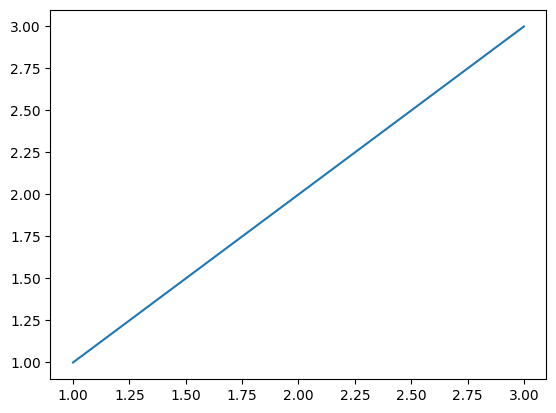

In [13]:
mat.pyplot.plot([1,2,3], [1,2,3])

In [14]:
res = """import matplotlib as mat
from matplotlib.pyplot import show
from matplotlib import pyplot as py
mat.show1()
show()
mat.show.plot([1,2,3], [1,2,3])"""

In [15]:
asnames = [ref.split('.')[1::1] for ref in re.findall(fr'mat\.[a-zA-Z_0-9\.]+', res)]
print(asnames)
asnames1 = [asname[-1] for asname in asnames]
asnames2 = [asname[:-1:1] for asname in asnames]
print(asnames1)
print(asnames2)
print(len(asnames2[0]) == 0)

[['show1'], ['show', 'plot']]
['show1', 'plot']
[[], ['show']]
True


In [16]:
from numpy import array

In [17]:
import numpy

In [18]:
numpy.array

<function numpy.array>

In [19]:
import matplotlib as mat

In [20]:
array

<function numpy.array>

In [21]:
asnames = [asname[-1] for asname in asnames]
asnames

['show1', 'plot']

In [22]:
asnames

['show1', 'plot']

In [23]:
refs = [ref.split(".") for ref in re.findall(rf'mat\.[a-zA-Z_\.]+', res)]

In [24]:
refs[0][-1]

'show'

In [25]:
".".join(refs[0][1:-1])

''

In [30]:
module = '.'.join(['matplotlib', '.'.join(refs[0][1:-1])])

In [27]:
spec = importlib.util.find_spec(module)
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

AttributeError: 'NoneType' object has no attribute 'loader'

In [32]:
module = 'from matplotlib import pyplot as py'

In [34]:
spec = importlib.util.find_spec('matplotlib')
type(importlib.util.module_from_spec(spec))

module

In [52]:
import importlib.util
import importlib

importlib.Module

AttributeError: module 'importlib' has no attribute 'Module'

In [54]:
from importlib.util import Module

ImportError: cannot import name 'Module' from 'importlib.util' (/usr/lib/python3.11/importlib/util.py)

In [78]:
import types
import importlib
spec: importlib.machinery.ModuleSpec = importlib.util.find_spec('matplotlib.pyplot')
module: types.ModuleType = importlib.util.module_from_spec(spec)

In [80]:
getattr(module, 'show')

AttributeError: module 'matplotlib.pyplot' has no attribute 'show'

In [66]:
import importlib
spec: importlib.machinery.ModuleSpec = importlib.util.find_spec('matplotlib')
module: importlib.Module = importlib.util.module_from_spec(spec)

AttributeError: module 'importlib' has no attribute 'Module'

In [61]:
import importlib
spec: importlib.machinery.ModuleSpec = importlib.util.find_spec('matplotlib')

In [60]:
import importlib.machinery  as imp
spec: imp.ModuleSpec = importlib.util.find_spec('matplotlib')

In [57]:
import importlib.util as ult
strings: ult.ModuleSpec = importlib.util.find_spec('matplotlib')

AttributeError: module 'importlib.util' has no attribute 'ModuleSpec'

In [42]:
import ast
ast.Module

ast.Module

In [37]:
from ast import Module
type(Module)

type

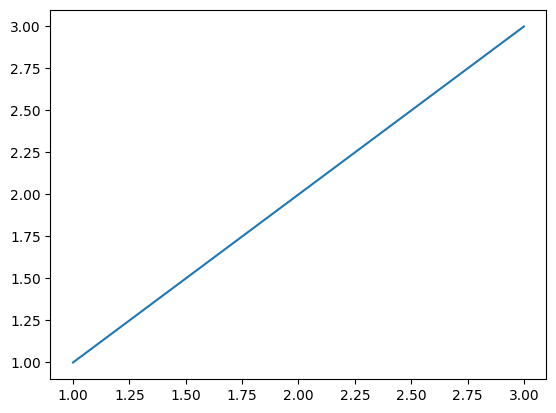

In [120]:
module.plot([1,2,3], [1,2,3])

In [92]:
re.sub(rf'mat(\.[a-zA-Z_\.]+)', r'matplotlib\1', res)

'import matplotlib as mat\nmatplotlib.pyplot.plot([1,2,3], [1,2,3])'

In [81]:
spec = importlib.util.find_spec("matplotlib")
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)
module.pyplot.plot([1,2,3], [1,2,3])
# getattr(f"{module.__name__}", "pyplot")

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [67]:
print(pydoc.render_doc(py.show))

Python Library Documentation: function show in module matplotlib.pyplot

show(*args, **kwargs) -> 'None'
    Display all open figures.
    
    Parameters
    ----------
    block : bool, optional
        Whether to wait for all figures to be closed before returning.
    
        If `True` block and run the GUI main loop until all figure windows
        are closed.
    
        If `False` ensure that all figure windows are displayed and return
        immediately.  In this case, you are responsible for ensuring
        that the event loop is running to have responsive figures.
    
        Defaults to True in non-interactive mode and to False in interactive
        mode (see `.pyplot.isinteractive`).
    
    See Also
    --------
    ion : Enable interactive mode, which shows / updates the figure after
          every plotting command, so that calling ``show()`` is not necessary.
    ioff : Disable interactive mode.
    savefig : Save the figure to an image file instead of showing it 

In [62]:
print(re.sub(fr'{asname}(\.[a-zA-Z_]+)', fr'{name}\1', res))

# This is a sample numpy.array(numpy.ones(5)) and another numpy.sum example
# Comment to check inline many functions

import numpy as np
from matplotlib.pyplot import show, plot
import numpy as np, matplotlib.pyplot as plt
 
x = numpy.linspace(0, 1, 100)
y = numpy.sin(2 * numpy.pi * x)

show()
pyplot.plot(x, y)
pyplot.show()



In [37]:
print(pydoc.render_doc(sh))

Python Library Documentation: function show in module matplotlib.pyplot

show(*args, **kwargs) -> 'None'
    Display all open figures.
    
    Parameters
    ----------
    block : bool, optional
        Whether to wait for all figures to be closed before returning.
    
        If `True` block and run the GUI main loop until all figure windows
        are closed.
    
        If `False` ensure that all figure windows are displayed and return
        immediately.  In this case, you are responsible for ensuring
        that the event loop is running to have responsive figures.
    
        Defaults to True in non-interactive mode and to False in interactive
        mode (see `.pyplot.isinteractive`).
    
    See Also
    --------
    ion : Enable interactive mode, which shows / updates the figure after
          every plotting command, so that calling ``show()`` is not necessary.
    ioff : Disable interactive mode.
    savefig : Save the figure to an image file instead of showing it 

In [1]:
from matplotlib import pyplot

In [3]:
from matplotlib.pyplot import show

"\n    Display all open figures.\n\n    Parameters\n    ----------\n    block : bool, optional\n        Whether to wait for all figures to be closed before returning.\n\n        If `True` block and run the GUI main loop until all figure windows\n        are closed.\n\n        If `False` ensure that all figure windows are displayed and return\n        immediately.  In this case, you are responsible for ensuring\n        that the event loop is running to have responsive figures.\n\n        Defaults to True in non-interactive mode and to False in interactive\n        mode (see `.pyplot.isinteractive`).\n\n    See Also\n    --------\n    ion : Enable interactive mode, which shows / updates the figure after\n          every plotting command, so that calling ``show()`` is not necessary.\n    ioff : Disable interactive mode.\n    savefig : Save the figure to an image file instead of showing it on screen.\n\n    Notes\n    -----\n    **Saving figures to file and showing a window at the same ti

# Replace alias with package name

In [4]:
lines = res.splitlines()

In [5]:
nps = re.findall(fr'{packages[0]["asname"]}\.[a-zA-Z]+', res)

In [6]:
print(nps)

['np.array', 'np.ones', 'np.sum', 'np.linspace', 'np.sin', 'np.pi']


In [7]:
pakNames = []

In [8]:
'module' in packages[-1]

True

In [31]:
documentations = []

In [13]:
import sys
"matplotlib" in sys.modules

True

In [93]:
from matplotlib.pyplot import *

In [95]:
from numpy import array

In [99]:
docs = "from matplotlib.pyplot.show "
module_api = "array"
module_name = "numpy"

In [107]:
module_api = "show"
module_name = "matplotlib.pyplot"

In [121]:
module_api = "pyplot"
module_name = "matplotlib"

In [129]:
"""
Create a class that has the functions the module dynamically from a string of the code snippet. The code snippet should cover all the test cases.
"""
class CodeSnippet:
    def __init__(self, code):
        self.code = code
        self.imports = []
        self.modules = []
        self.functions = []
        self.classes = []
        self.variables = []
        self.comments = []
        self.lines = code.splitlines()
        self.parse()

    def parse(self):
        for line in self.lines:
            if line.startswith("#"):
                self.comments.append(line)
            elif line.startswith("import"):
                self.imports.append(line)
            elif line.startswith("from"):
                self.imports.append(line)
            elif line.startswith("class"):
                self.classes.append(line)
            elif line.startswith("def"):
                self.functions.append(line)
            else:
                self.variables.append(line)

    def get_imports(self):
        return self.imports

    def get_modules(self):
        return self.modules

    def get_functions(self):
        return self.functions

    def get_classes(self):
        return self.classes

    def get_variables(self):
        return self.variables

    def get_comments(self):
        return self.comments

    def get_lines(self):
        return self.lines

    def get_code(self):
        return self.code

    def __str__(self):
        return self.code

    def __repr__(self):
        return self.code


code_snippet = CodeSnippet(res)
code_snippet.get_imports()

['import numpy as np',
 'from numpy as array',
 'from matplotlib import pyplot',
 'from matplotlib.pyplot import plot, show']

In [152]:
spec = importlib.util.find_spec("matplotlib.pyplot")
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

In [153]:
"""check if a module has a attribute or not E.G. matplotlib has pyplot attribute"""
hasattr(module, "show")

True

In [170]:
res = "from matplotlib.pyplot import show"

In [172]:
res = "from matplotlib import pyplot"

In [181]:
res = "from matplotlib.pyplot import show, plot"

In [188]:
for node in ast.walk(ast.parse(res)):
    if "module" in node.__dir__():
        spec = importlib.util.find_spec(node.module)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)
        
        for name in node.names:
            if not hasattr(module, name.name):
                print(False)
            else:
                print(True)
            print(node.module, name.name)

True
matplotlib.pyplot show
True
matplotlib.pyplot plot


In [191]:
from matplotlib import pyplot as py

In [192]:
py.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [186]:
"""
Write a function that takes a code snippet and imports the from statements modules and attribuites
Before importing it check if the attrbute is actually present in the module and if not then import
the module with the attribute.
"""
def import_from_statement(code):
    for node in ast.walk(ast.parse(code)):
        if "module" in node.__dir__():
            spec = importlib.util.find_spec(node.module)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)

            for name in node.names:
                if not hasattr(module, name.name):
                    print(False)
                else:
                    print(True)
                print(node.module, name.name)

In [123]:
if len(module_name.split(".")) > 1:
    module = importlib.import_module(module_name)
    module_apis = pydoc.render_doc(getattr(module, module_api))
else:
    module = importlib.import_module(".".join([module_name, module_api]))
    module_apis = pydoc.render_doc(getattr(module, "show"))
    print("module_api")
print(module_apis)
# print(module_api.__doc__)

module_api
Python Library Documentation: function show in module matplotlib.pyplot

show(close=None, block=None)
    Display all open figures.
    
    Parameters
    ----------
    block : bool, optional
        Whether to wait for all figures to be closed before returning.
    
        If `True` block and run the GUI main loop until all figure windows
        are closed.
    
        If `False` ensure that all figure windows are displayed and return
        immediately.  In this case, you are responsible for ensuring
        that the event loop is running to have responsive figures.
    
        Defaults to True in non-interactive mode and to False in interactive
        mode (see `.pyplot.isinteractive`).
    
    See Also
    --------
    ion : Enable interactive mode, which shows / updates the figure after
          every plotting command, so that calling ``show()`` is not necessary.
    ioff : Disable interactive mode.
    savefig : Save the figure to an image file instead of sho

In [106]:
spec = importlib.util.find_spec("matplotlib.pyplot")
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

# print(pydoc.render_doc())

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [85]:
documentations = []

In [86]:
for package in packages:
    if "module" in package:
        module_name = package["module"]
        module_api = package["name"]
        
        spec = importlib.util.find_spec(module_name)
        print(module_name)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)

        function_definition = getattr(module, module_api)
        documentation = pydoc.render_doc(function_definition)
        documentations.append({"module": ".".join([package_module, module_function]), "documentation": documentation})
    else:
        last_module = None
        package_module = package["name"]
        module_function = package["asname"]

        if module_function is None:
            package_references = re.findall(rf"{package['name']}\.[a-zA-Z]+", res)
            package_references = [package_reference.rsplit('.', 1) for package_reference in package_references]
            
            for package_module, module_function in package_references:
                spec = importlib.util.find_spec(package_module)
                module = importlib.util.module_from_spec(spec)
                spec.loader.exec_module(module)
                function_definition = getattr(module, module_function)
                documentation = pydoc.render_doc(function_definition)
                documentations.append({"module": ".".join([package_module, module_function]), "documentation": documentation})
        else:
            package_references = re.findall(rf"{package['asname']}\.[a-zA-Z]+", res)
            package_references = [re.sub(module_function, package_module, package_reference) for package_reference in package_references]    
            for package_reference in package_references:
                package_module, package_function = package_reference.split(".")
                if last_module != package_module:
                    spec = importlib.util.find_spec(package_module)
                    module = importlib.util.module_from_spec(spec)
                    spec.loader.exec_module(module)
                    last_module = module
                function_definition = getattr(module, package_function)
                documentation = pydoc.render_doc(function_definition)
                documentations.append({"module": package_reference, "documentation": documentation})

with open("example-documentation.json", "w") as json_file:
    json.dump(documentations, json_file)

/tmp/ipykernel_553962/1994217152.py:38: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  spec.loader.exec_module(module)
/tmp/ipykernel_553962/1994217152.py:38: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  spec.loader.exec_module(module)
/tmp/ipykernel_553962/1994217152.py:38: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  spec.loader.exec_module(module)
/tmp/ipykernel_553962/1994217152.py:38: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  spec.loader.exec_module(module)
/tmp/ipykernel_553962/1994217152.py:38: UserWarning: The NumPy module was reloaded (imported a second time). This can in

ValueError: too many values to unpack (expected 2)

In [19]:
import tiktoken
import 

In [25]:
enc = tiktoken.get_encoding("p50k_base")
here = enc.encode("\n".join([documentation["documentation"] for documentation in documentations]))

In [26]:
len(here)

7984

In [12]:
documentations

[{'module': 'numpy.array',
  'documentation': "Python Library Documentation: built-in function array in module numpy\n\na\x08ar\x08rr\x08ra\x08ay\x08y(...)\n    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,\n          like=None)\n    \n    Create an array.\n    \n    Parameters\n    ----------\n    object : array_like\n        An array, any object exposing the array interface, an object whose\n        ``__array__`` method returns an array, or any (nested) sequence.\n        If object is a scalar, a 0-dimensional array containing object is\n        returned.\n    dtype : data-type, optional\n        The desired data-type for the array. If not given, NumPy will try to use\n        a default ``dtype`` that can represent the values (by applying promotion\n        rules when necessary.)\n    copy : bool, optional\n        If true (default), then the object is copied.  Otherwise, a copy will\n        only be made if ``__array__`` returns a copy, if obj is a nested\

In [11]:
spec = importlib.util.

SyntaxError: invalid syntax (2074393657.py, line 1)

In [ ]:
re.findall(r'np\.[a-zA-Z]+', res)

In [ ]:
print(documentations)

In [ ]:
pakDef = [re.sub(packages[0]["asname"], packages[0]["name"], np) for np in nps]

In [ ]:
pakDef

In [ ]:
module = importlib.import_module("matplotlib.pyplot")

In [ ]:
module = importlib.import_module("matplotlib")

In [ ]:
help(importlib.util.find_spec)

In [ ]:
help(importlib.util.module_from_spec)

In [ ]:
spec = importlib.util.find_spec("numpy")
print(help(spec.loader.exec_module))

In [ ]:
spec = importlib.util.find_spec("matplotlib")
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

In [ ]:
import matplotlib

In [ ]:
matplotlib.pyplot.show

In [ ]:
func = eval("matplotlib"+".pyplot")

In [ ]:
getattr(module, "pyplot.show")

In [ ]:
getattr(getattr(module, "pyplot.show"), "")

In [ ]:
for function in ["pyplot", "show"]:
    func = getattr(

In [ ]:
import matplotlib

In [ ]:
matplotlib.pyplot.__doc__

In [ ]:
import importlib.util
import inspect

def get_function_docs(module_name, function_name):
    try:
        # Import the module dynamically
        spec = importlib.util.find_spec(module_name)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)

        functions = function_name.split(".")

        getattr(getattr(module, functions[0]), function[1])

        func = getattr(module, functions[0])
        for function in functions[1:]:
            func = getattr(func, function)
        print(func)
        # Get the function dynamically
        function = getattr(module, function_name)

        # Use inspect to get documentation
        docstring = inspect.getdoc(func)
        return docstring
    except (ImportError, AttributeError):
        return None

if __name__ == "__main__":
    module_name = "matplotlib"
    function_name = "pyplot.show"

    docstring = get_function_docs(module_name, function_name)

    if docstring:
        print(f"Documentation for {module_name}.{function_name}:\n{docstring}\n")
    else:
        print(f"No documentation found for {module_name}.{function_name}\n")

In [ ]:
import matplotlib

In [ ]:
matplotlib.pyplot.show.__doc__

In [ ]:
help(getattr(getattr(module, "pyplot"), "show"))

In [ ]:
print(module.__doc__)

In [ ]:
module = importlib.import_module(packages[0]["name"])

In [ ]:
del numpy

In [ ]:
print(help(getattr(module, pakDef[0].split(".")[-1])))

In [ ]:
re.sub(fr'{packages[0]["asname"]}', packages[0]["name"], nps)

In [ ]:
print(pydoc.render_doc(re.search))

In [ ]:
print(pydoc.render_doc(re.match))

In [ ]:
re.sub(fr'{packages[0]["asname"]}\.[a-zA-Z]+', packages[0]['name'], res)

In [ ]:
print(help(re.sub))

In [ ]:
print(re.__doc__)

In [ ]:
print(help(re))

In [ ]:
print(pydoc.render_doc(re.sub))

In [ ]:
print(pydoc.render_doc(re.search))

# The problem is that there might be other definitionas similar to this that can not be detected

In [ ]:
print(re.Pattern.__doc__)
# BTW, This has huge doc for other two methods

In [ ]:
print(re.sub.__doc__)

In [ ]:
print(help(re.sub))

In [ ]:
print(pydoc.render_doc(re.sub))